In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [6]:
api_key = '2f0fdd5d49254c06b7dc54cc45a4b628'
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'
start_date = '2023-10-03 00:00:00'
end_date = '2023-10-20 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [11]:
data = requests.get(api_url).json()
data_final = pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2023-10-03 00:00:00,27504.03000,27547.65000,27501.82000,27512.36000
1,2023-10-03 00:05:00,27512.36000,27536.93000,27487.52000,27522.12000
2,2023-10-03 00:10:00,27522.03000,27528.53000,27494.32000,27503.93000
3,2023-10-03 00:15:00,27504.01000,27534.39000,27491.54000,27526.35000
4,2023-10-03 00:20:00,27526.37000,27538.14000,27515.56000,27529.38000
...,...,...,...,...,...
4892,2023-10-19 23:40:00,28660.12000,28681.07000,28650.00000,28679.33000
4893,2023-10-19 23:45:00,28679.33000,28707.67000,28677.92000,28698.46000
4894,2023-10-19 23:50:00,28698.46000,28726.25000,28694.87000,28715.54000
4895,2023-10-19 23:55:00,28715.54000,28739.61000,28707.43000,28735.34000


In [12]:
#squeezing data between 0 and 1

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [13]:
scaled_data

array([[0.337789  ],
       [0.34118027],
       [0.33485987],
       ...,
       [0.75585306],
       [0.76273289],
       [0.77615897]])

In [14]:
data_final['close'].values.reshape(-1,1).shape

(4897, 1)

In [15]:
scaled_data.shape

(4897, 1)

In [16]:
time_intervals_to_train = 24
prediction_interval = 12

x_train = []
y_train = []


In [17]:
#0 to 24 to predict 36th 
#1 to 25 to predict 37th

In [18]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
    x_train.append(scaled_data[i - time_intervals_to_train: i, 0])
    y_train.append(scaled_data[i + prediction_interval, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [20]:
x_train.shape

(4861, 24)

In [21]:
y_train.shape

(4861,)

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [30]:
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1), activation = 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid')) #to squeeze data between 0 and 1

In [31]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10


76/76 [==============================] - 6s 36ms/step - loss: 0.0184 - accuracy: 2.0572e-04
Epoch 2/10
76/76 [==============================] - 3s 34ms/step - loss: 0.0029 - accuracy: 2.0572e-04
Epoch 3/10
76/76 [==============================] - 3s 34ms/step - loss: 0.0027 - accuracy: 2.0572e-04
Epoch 4/10
76/76 [==============================] - 3s 35ms/step - loss: 0.0025 - accuracy: 2.0572e-04
Epoch 5/10
76/76 [==============================] - 3s 34ms/step - loss: 0.0026 - accuracy: 2.0572e-04
Epoch 6/10
76/76 [==============================] - 3s 34ms/step - loss: 0.0024 - accuracy: 2.0572e-04
Epoch 7/10
76/76 [==============================] - 3s 42ms/step - loss: 0.0024 - accuracy: 2.0572e-04
Epoch 8/10
76/76 [==============================] - 3s 43ms/step - loss: 0.0023 - accuracy: 2.0572e-04
Epoch 9/10
76/76 [==============================] - 3s 43ms/step - loss: 0.0023 - accuracy: 2.0572e-04
Epoch 10/10
76/76 [==============================] - 3s 43ms/step - los

In [33]:
test_start = '2023-10-20 00:00:00'
test_end = '2023-10-23 00:00:00'

test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start}&end_date={test_end}&interval={interval}&order={order}&apikey={api_key}'

test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2023-10-20 00:00:00,28734.51000,28785.82000,28719.12000,28773.98000
1,2023-10-20 00:05:00,28773.17000,28789.28000,28755.34000,28773.07000
2,2023-10-20 00:10:00,28773.06000,28778.83000,28729.04000,28732.50000
3,2023-10-20 00:15:00,28732.16000,28740.15000,28703.77000,28705.85000
4,2023-10-20 00:20:00,28707.36000,28712.61000,28690.22000,28696.55000
...,...,...,...,...,...
860,2023-10-22 23:40:00,29981.62000,30018.29000,29979.58000,30013.17000
861,2023-10-22 23:45:00,30013.16000,30018.26000,29982.32000,30001.46000
862,2023-10-22 23:50:00,30001.46000,30022.96000,29974.33000,29977.28000
863,2023-10-22 23:55:00,29977.63000,30004.15000,29974.88000,30004.15000


In [37]:
bitcoin_prices = pd.to_numeric(test_data_final['close'], errors = 'coerce').values

test_inputs = test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)

model_inputs = scaler.fit_transform(test_inputs)

In [39]:
model_inputs.shape

(865, 1)

In [42]:
x_test = []

for x in range(time_intervals_to_train, len(model_inputs)):
    x_test.append(model_inputs[x - time_intervals_to_train:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
x_test.shape

(841, 24, 1)

In [48]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

27/27 [==============================] - 0s 10ms/step


In [49]:
prediction_prices

array([[28690.537],
       [28689.195],
       [28688.025],
       [28687.564],
       [28687.748],
       [28688.703],
       [28690.273],
       [28693.084],
       [28697.275],
       [28702.992],
       [28710.748],
       [28720.74 ],
       [28733.01 ],
       [28747.303],
       [28763.455],
       [28781.168],
       [28800.723],
       [28822.893],
       [28848.11 ],
       [28875.85 ],
       [28905.504],
       [28936.703],
       [28967.795],
       [28998.32 ],
       [29027.393],
       [29055.316],
       [29081.41 ],
       [29104.988],
       [29126.043],
       [29144.416],
       [29161.69 ],
       [29175.414],
       [29187.516],
       [29198.3  ],
       [29206.926],
       [29214.408],
       [29222.203],
       [29230.07 ],
       [29237.602],
       [29244.074],
       [29248.99 ],
       [29252.246],
       [29253.791],
       [29254.514],
       [29253.572],
       [29251.322],
       [29248.67 ],
       [29245.404],
       [29241.69 ],
       [29237.424],


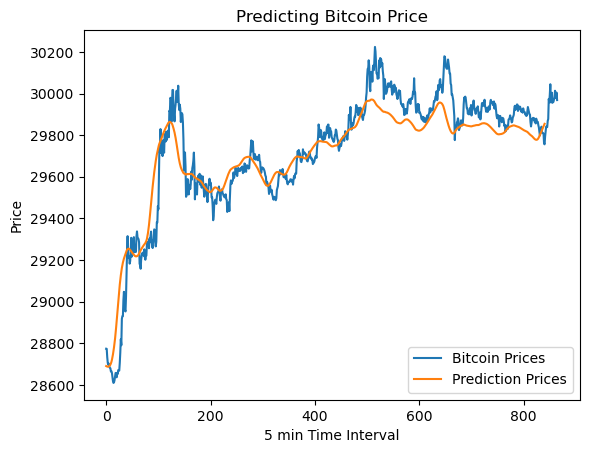

In [55]:
plt.plot(bitcoin_prices, label = 'Bitcoin Prices')
plt.plot(prediction_prices, label = 'Prediction Prices')
plt.title('Predicting Bitcoin Price')
plt.xlabel('5 min Time Interval')
plt.ylabel('Price')
plt.legend(loc='lower right', fontsize=10)
plt.show()

In [56]:
last_data = model_inputs[len(model_inputs)+1 - time_intervals_to_train : len(model_inputs) + 1, 0]
last_data = np.array(last_data)

In [57]:
last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

In [58]:
prediction = model.predict(last_data)

1/1 [==============================] - 0s 381ms/step


In [59]:
prediction = scaler.inverse_transform(prediction)

In [60]:
prediction

array([[29847.2]], dtype=float32)